# Global Emissions

- Information about the methane gas emissions from various sources.


- https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions

### Description Statistics

In [27]:
import pandas as pd
import seaborn as sns

methane = pd.read_csv('./Methane_final.csv', sep=',', header=0)
methane = methane.drop(methane.columns[0], axis=1)
methane

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...
1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [60]:
print(methane.region.value_counts())

Africa                       406
Europe                       302
Asia Pacific                 270
Middle East                  187
Central and South America    183
Russia & Caspian              96
North America                 61
World                         22
Other                         21
Name: region, dtype: int64


In [56]:
print(methane.type.value_counts())

Energy         1233
Agriculture     105
Other           105
Waste           105
Name: type, dtype: int64


In [57]:
print(methane.segment.value_counts())

Total                                             414
Onshore oil                                       217
Gas pipelines and LNG facilities                  164
Offshore oil                                      159
Onshore gas                                       144
Offshore gas                                      118
Other from oil and gas                             98
Bioenergy                                          93
Other from coal                                    66
Steam coal                                         30
Coking coal                                        24
Satellite-detected large oil and gas emissions     21
Name: segment, dtype: int64


In [58]:
print(methane.reason.value_counts())

All         746
Fugitive    342
Vented      342
Flared      118
Name: reason, dtype: int64


In [59]:
print(methane.region.value_counts())

Africa                       406
Europe                       302
Asia Pacific                 270
Middle East                  187
Central and South America    183
Russia & Caspian              96
North America                 61
World                         22
Other                         21
Name: region, dtype: int64


- emissions depending on the type

In [30]:
print(methane.groupby('type')[['emissions']].describe().unstack('type'))

                  type       
emissions  count  Agriculture       105.000000
                  Energy           1233.000000
                  Other             105.000000
                  Waste             105.000000
           mean   Agriculture      2788.179703
                  Energy            435.844535
                  Other             188.253780
                  Waste            1388.937314
           std    Agriculture     14066.046087
                  Energy           4183.397653
                  Other             969.274842
                  Waste            6988.302089
           min    Agriculture         0.078721
                  Energy              0.000459
                  Other               0.051872
                  Waste               2.491305
           25%    Agriculture       105.691032
                  Energy              1.732090
                  Other               3.937007
                  Waste              83.356560
           50%    Agriculture 

- emissions depending on the region

In [31]:
print(methane.groupby('region')[['emissions']].describe().unstack('region'))

                  region                   
emissions  count  Africa                          406.000000
                  Asia Pacific                    270.000000
                  Central and South America       183.000000
                  Europe                          302.000000
                  Middle East                     187.000000
                                                   ...      
           max    Middle East                    5629.822266
                  North America                 16769.630859
                  Other                          7259.014160
                  Russia & Caspian              18078.083984
                  World                        141953.765625
Length: 72, dtype: float64


- emissions depending on the country

In [35]:
print(methane.groupby('country')[['emissions']].describe().unstack('country'))

                  country   
emissions  count  Algeria           15.000000
                  Angola            16.000000
                  Argentina         20.000000
                  Australia         22.000000
                  Azerbaijan        18.000000
                                    ...      
           max    Uzbekistan       901.682617
                  Venezuela       2642.703613
                  Vietnam         2193.262695
                  World         141953.765625
                  Yemen            181.292984
Length: 840, dtype: float64


### visualization

#### Emissions Depending on Where Emissions Occur

Text(0.5, 1.0, 'Emissions by Sector')

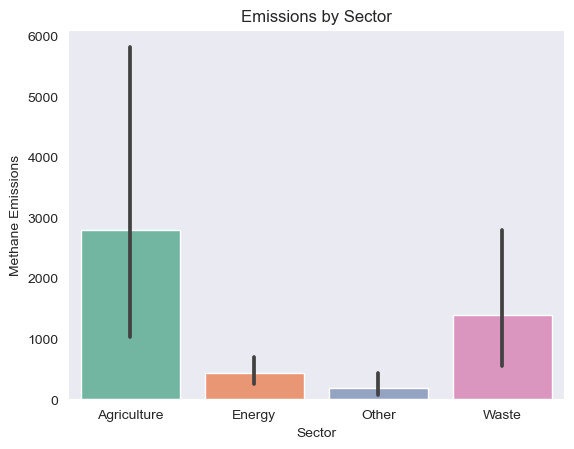

In [67]:
import matplotlib.pyplot as plt
sns.barplot(data=methane, x='type', y='emissions', palette='Set2')
plt.xlabel('Sector')
plt.ylabel('Methane Emissions')
plt.title('Emissions by Sector')

#### Find different emissions by region

Text(0.5, 1.0, 'Emissions in Different Region')

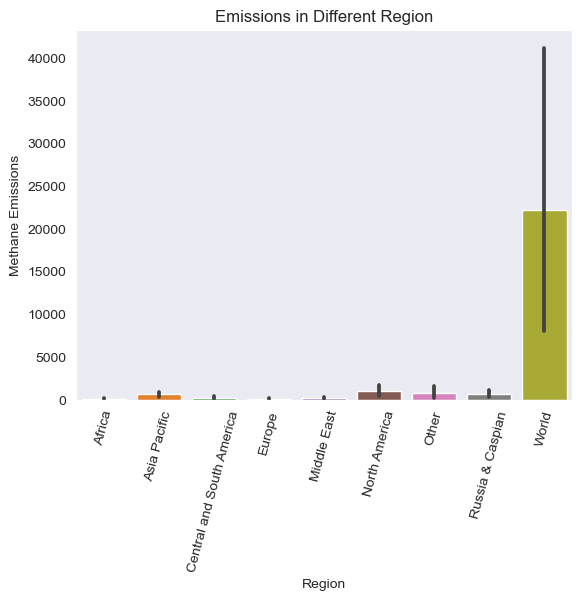

In [98]:
graph1 = sns.barplot(data=methane, x='region', y='emissions')
plt.xticks(rotation=75)

plt.xlabel('Region')
plt.ylabel('Methane Emissions')
plt.title('Emissions in Different Region')

#### Find the top 10 countries with the highest emissions

In [80]:
top_countries = methane.groupby('country')['emissions'].sum().sort_values(ascending=False).head(10)
top_countries

country
World             489152.316956
China              81048.371586
United States      48604.877296
Russia             42432.929804
India              34852.007386
Brazil             21720.838126
Indonesia          19404.469000
European Union     18985.173461
Other              15997.357175
Iran               13030.685366
Name: emissions, dtype: float64

- sort again except 'World'

In [89]:
top_countries = methane[methane['country'] != 'World'].groupby('country')['emissions'].sum().sort_values(ascending=False).head(10)
top_countries

country
China             81048.371586
United States     48604.877296
Russia            42432.929804
India             34852.007386
Brazil            21720.838126
Indonesia         19404.469000
European Union    18985.173461
Other             15997.357175
Iran              13030.685366
Nigeria            9903.895667
Name: emissions, dtype: float64

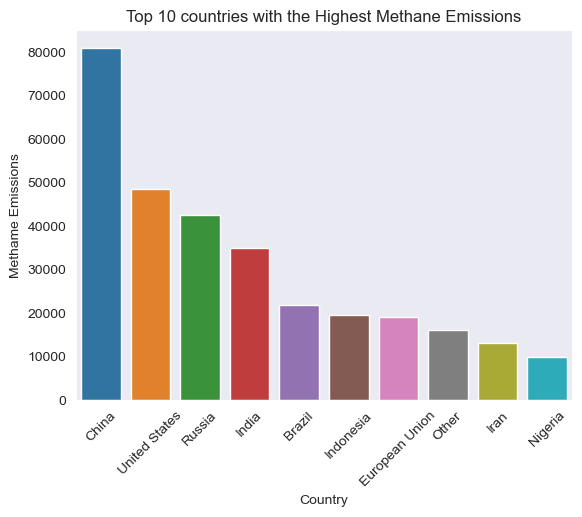

In [92]:
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Methame Emissions')
plt.title('Top 10 countries with the Highest Methane Emissions')
plt.show()

#### Find the top 10 countries with the lowest emissions

In [95]:
bottom_countries = methane[methane['country'] != 'World'].groupby('country')['emissions'].sum().sort_values().head(10)
bottom_countries

country
Seychelles         2.621898
Liberia           43.897755
Gambia            47.587691
Slovenia          83.387466
Guinea-Bissau     87.772880
Estonia           90.482612
Brunei            97.750330
Lebanon          134.482345
Togo             136.872366
Sierra Leone     145.844551
Name: emissions, dtype: float64

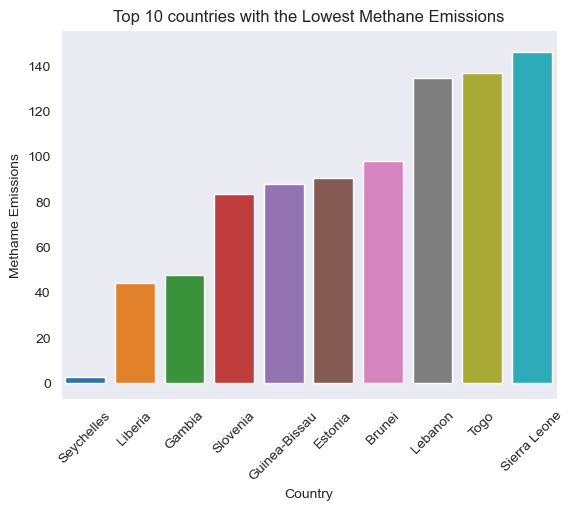

In [97]:
sns.barplot(x=bottom_countries.index, y=bottom_countries.values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Methame Emissions')
plt.title('Top 10 countries with the Lowest Methane Emissions')
plt.show()